<a href="https://colab.research.google.com/github/Thripura24/Thripura24/blob/main/Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
file_path = "Product Positioning.csv"
df = pd.read_csv(file_path)
df

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
...,...,...,...,...,...,...,...,...,...,...
995,162658,End-cap,11.56,8.61,No,Medium,Families,Electronics,Yes,1133
996,146858,Front of Store,47.72,46.78,No,Medium,College students,Food,Yes,565
997,174565,Aisle,21.30,18.71,Yes,High,Seniors,Electronics,No,890
998,160629,Aisle,22.82,19.13,No,Medium,Seniors,Electronics,Yes,2538


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [4]:
# Data cleaning
# Check for missing values
missing_values = df.isnull().sum()

# Print the missing values
print("Missing Values:")
print(missing_values)

# Check for duplicates
df.duplicated().any()

Missing Values:
Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64


False

In [5]:
# Exploratory data analysis
df.select_dtypes('object').describe()

,Product Position,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,4,3,2
top,End-cap,No,High,Families,Clothing,Yes
freq,342,528,340,263,338,505


In [6]:
for col in df.select_dtypes('object').columns:
    print(f'unique values in {col}: ',df[col].unique())

unique values in Product Position:  ['Aisle' 'End-cap' 'Front of Store']
unique values in Promotion:  ['No' 'Yes']
unique values in Foot Traffic:  ['Medium' 'Low' 'High']
unique values in Consumer Demographics:  ['Families' 'Seniors' 'Young adults' 'College students']
unique values in Product Category:  ['Clothing' 'Electronics' 'Food']
unique values in Seasonal:  ['No' 'Yes']


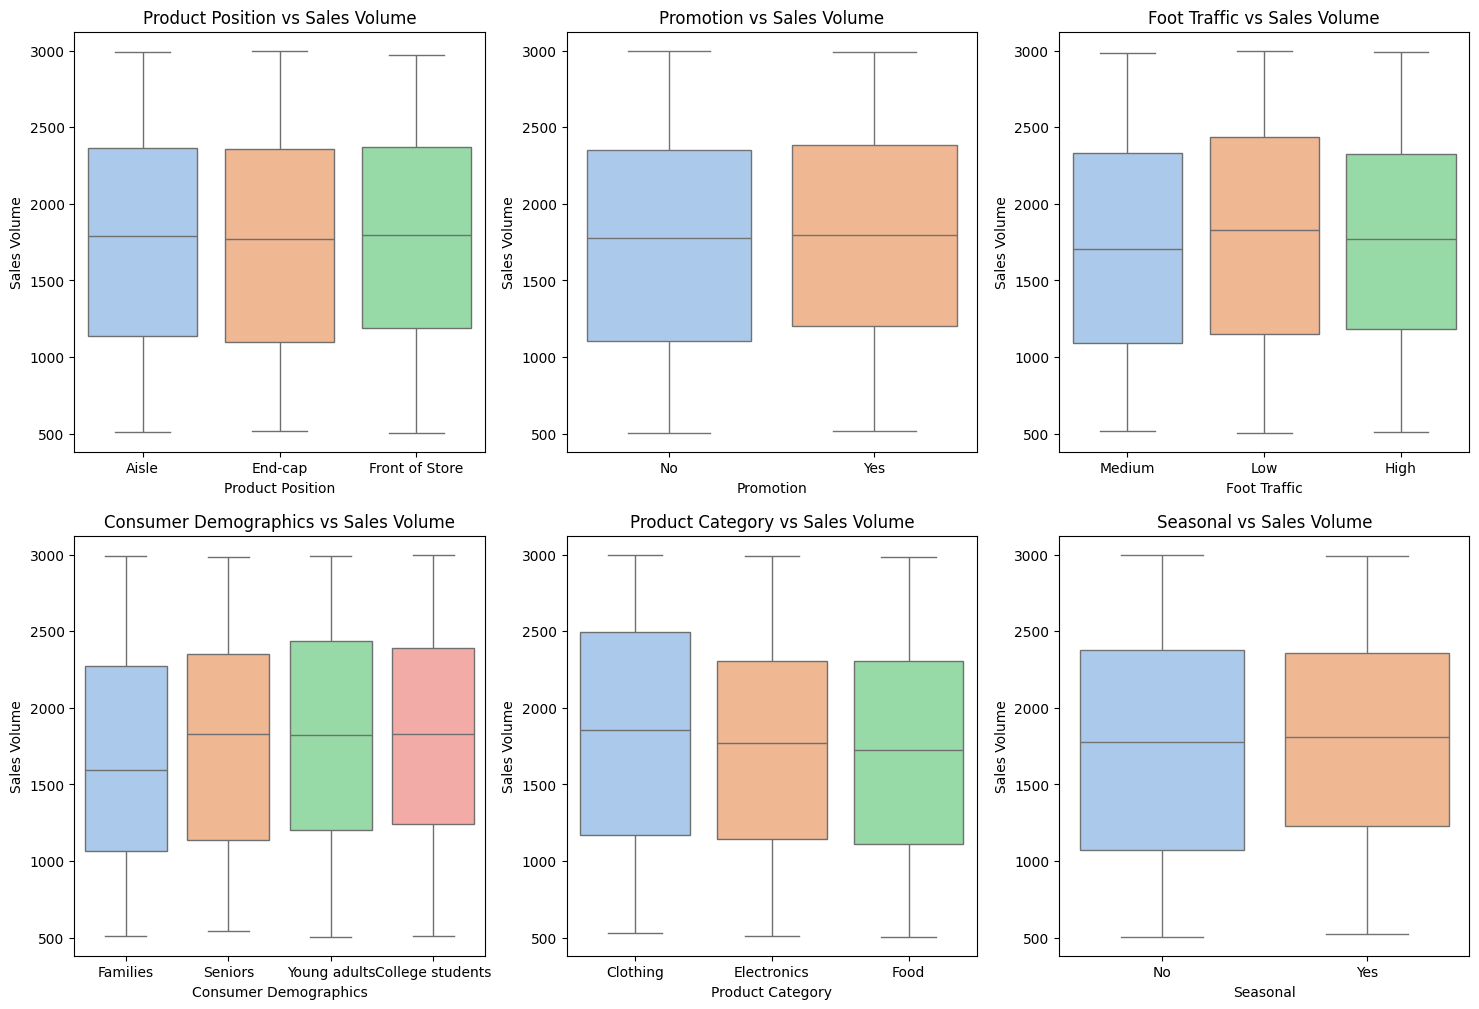

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

for i, col in enumerate(df.select_dtypes('object').columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col], y=df['Sales Volume'], palette='pastel', hue=df[col])
    plt.title(f'{col} vs Sales Volume')


In [ ]:
for col in df.select_dtypes('object').columns:
    print(df.groupby(col)['Sales Volume'].sum())

Product Position
Aisle             605470
End-cap           599917
Front of Store    563924
Name: Sales Volume, dtype: int64
Promotion
No     929927
Yes    839384
Name: Sales Volume, dtype: int64
Foot Traffic
High      598166
Low       580813
Medium    590332
Name: Sales Volume, dtype: int64
Consumer Demographics
College students    450063
Families            443276
Seniors             444089
Young adults        431883
Name: Sales Volume, dtype: int64
Product Category
Clothing       618580
Electronics    587517
Food           563214
Name: Sales Volume, dtype: int64
Seasonal
No     865910
Yes    903401
Name: Sales Volume, dtype: int64


In [ ]:
sales_by_category_position = df.groupby(['Product Category','Product Position'])['Sales Volume'].sum().reset_index()
sales_by_category_position

,Product Category,Product Position,Sales Volume
0,Clothing,Aisle,205272
1,Clothing,End-cap,215166
2,Clothing,Front of Store,198142
3,Electronics,Aisle,208371
4,Electronics,End-cap,205724
5,Electronics,Front of Store,173422
6,Food,Aisle,191827
7,Food,End-cap,179027
8,Food,Front of Store,192360


Product Position        Aisle      End-cap  Front of Store
Product Category                                          
Clothing          1832.785714  1749.317073     1923.708738
Electronics       1780.948718  1728.773109     1734.220000
Food              1728.171171  1790.270000     1672.695652


Promotion                  No          Yes
Product Category                          
Clothing          1869.095745  1781.266667
Electronics       1725.598837  1772.646341
Food              1676.988095  1781.518987


Foot Traffic             High          Low       Medium
Product Category                                       
Clothing          1770.293103  1931.869565  1785.616822
Electronics       1780.491228  1729.535088  1734.944444
Food              1725.781818  1736.354839  1722.739837


Consumer Demographics  College students     Families     Seniors  Young adults
Product Category                                                              
Clothing                    1879.870968  1803.

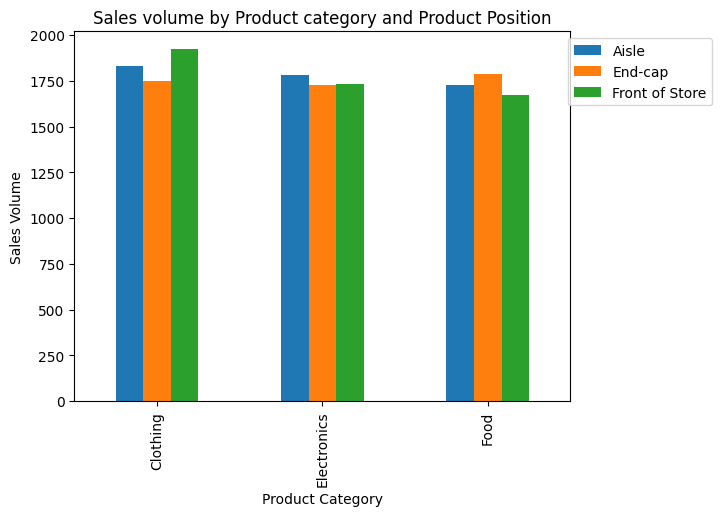

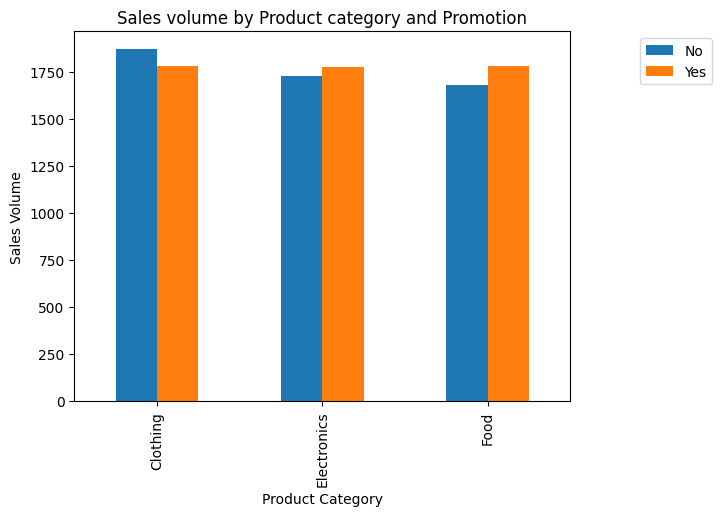

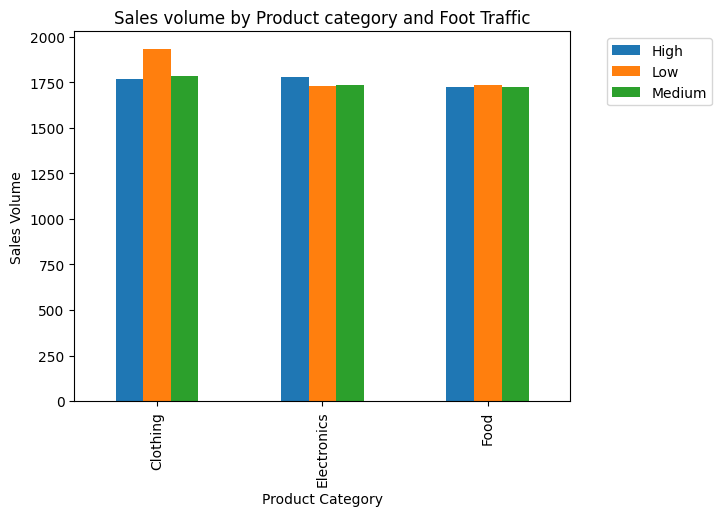

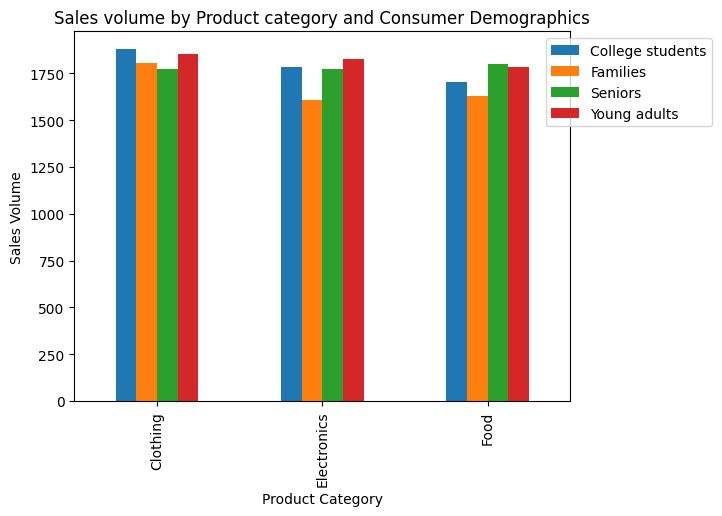

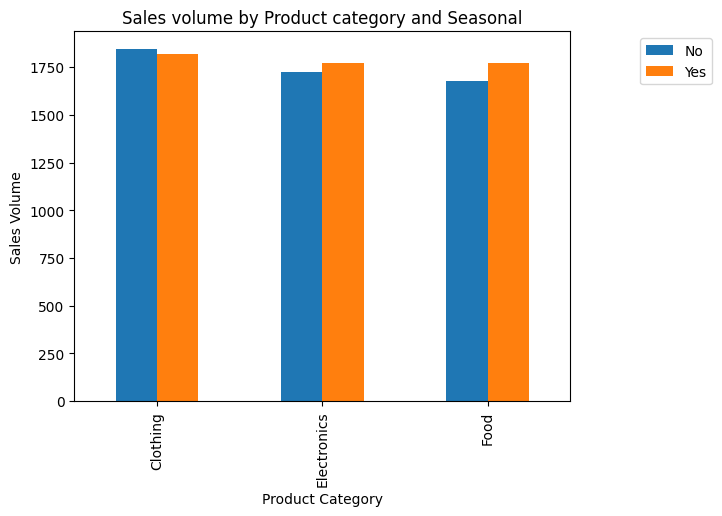

In [ ]:
for col in df.select_dtypes('object').columns:
    if col != 'Product Category':
        a = df.pivot_table(index='Product Category', columns= col, values='Sales Volume')
        print(a)
        print('\n')
        a.plot(kind='bar')
        plt.ylabel('Sales Volume')
        plt.legend(bbox_to_anchor=(1.3,1))
        plt.title(f'Sales volume by Product category and {col}')
    else:
        pass


1-Product Position:

For each product category, the average sales volume varies slightly across different product positions. For example, for Clothing, the average sales volume is highest at 'Front of Store' (1923.71) and lowest at 'End-cap' (1749.32).
This suggests that product position may have some impact on sales volume, with certain positions potentially attracting more customers or generating more sales.

2- Promotion:

The average sales volume varies between 'No' and 'Yes' promotions across different product categories. However, the differences are not consistent across categories.
For example, in the Clothing category, the average sales volume is slightly higher when there is no promotion ('No': 1869.10) compared to when there is a promotion ('Yes': 1781.27).
This indicates that the impact of promotion on sales volume may vary depending on the product category.

3- Foot Traffic:

Average sales volume varies slightly across different levels of foot traffic for each product category. However, the differences are not very pronounced.
For example, in the Clothing category, the average sales volume is highest for 'Low' foot traffic (1931.87) and lowest for 'Medium' foot traffic (1785.62).
This suggests that foot traffic may have some influence on sales volume, but the effect is not consistent across categories. Consumer Demographics:

4- Consumer Demographics:

Average sales volume varies across different consumer demographics within each product category. For example, in the Clothing category, the average sales volume is highest for 'College students' (1879.87) and lowest for 'Families' (1803.91).
This indicates that different consumer demographics may have different purchasing behaviors, influencing sales volume in various product categories. Seasonal:

5- Seasonal:

Average sales volume shows some variation between seasons within each product category. However, the differences are not substantial.
For example, in the Clothing category, the average sales volume is slightly higher during the 'No' seasonal period (1844.63) compared to the 'Yes' seasonal period (1817.08).
This suggests that seasonal factors may have a minor impact on sales volume, but it may not be significant in all product categories.

Overall, this analysis provides insights into how different categorical variables may influence sales volume in various product categories. However, further analysis or hypothesis testing may be needed to determine the significance of these relationships.

# **Anova test**

Null Hypothesis (H0): There is no significant difference in sales volume across different levels of the categorical variable.

Alternative Hypothesis (H1): There is a significant difference in sales volume across different levels of the categorical variable.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df.columns = df.columns.str.replace(' ', '_')

In [ ]:
for col in df.select_dtypes('object').columns:
    model = ols(f'Sales_Volume ~ C({col})',data=df).fit()
    anova_table = sm.stats.anova_lm(model,typ=2)
    print(f'anova table for {col}',anova_table)
    print('\n')

anova table for Product_Position                            sum_sq     df         F    PR(>F)
C(Product_Position)  1.286908e+05    2.0  0.124463  0.882985
Residual             5.154345e+08  997.0       NaN       NaN


anova table for Promotion                     sum_sq     df         F    PR(>F)
C(Promotion)  7.313390e+04    1.0  0.141589  0.706787
Residual      5.154901e+08  998.0       NaN       NaN


anova table for Foot_Traffic                        sum_sq     df         F    PR(>F)
C(Foot_Traffic)  5.914720e+05    2.0  0.572553  0.564269
Residual         5.149718e+08  997.0       NaN       NaN


anova table for Consumer_Demographics                                 sum_sq     df         F    PR(>F)
C(Consumer_Demographics)  2.706243e+06    3.0  1.751897  0.154744
Residual                  5.128570e+08  996.0       NaN       NaN


anova table for Product_Category                            sum_sq     df         F    PR(>F)
C(Product_Category)  1.960224e+06    2.0  1.902582  0.1497

For each categorical variable, the ANOVA tests the null hypothesis that there is no significant effect of that variable on sales volume.
The p-values (PR(>F)) for all variables are greater than 0.05, suggesting that we fail to reject the null hypothesis for each variable.
Therefore, based on these results, there is insufficient evidence to conclude that any of the categorical variables significantly impact sales volume at the 0.05 significance level.

In [ ]:
for col in df.select_dtypes('object').columns:
    if col != 'Product_Category':
        model = ols(f'Sales_Volume ~ C(Product_Category) * C({col})',data=df).fit()
        anova_table = sm.stats.anova_lm(model,typ=2)
        print(f'anova table for interaction between Product Category and {col}: ',anova_table)
        print('\n')

anova table for interaction between Product Category and Product_Position:                                                 sum_sq     df         F  \
C(Product_Category)                      1.999996e+06    2.0  1.939453   
C(Product_Position)                      1.684622e+05    2.0  0.163363   
C(Product_Category):C(Product_Position)  2.466922e+06    4.0  1.196122   
Residual                                 5.109676e+08  991.0       NaN   

                                           PR(>F)  
C(Product_Category)                      0.144328  
C(Product_Position)                      0.849306  
C(Product_Category):C(Product_Position)  0.310867  
Residual                                      NaN  


anova table for interaction between Product Category and Promotion:                                          sum_sq     df         F    PR(>F)
C(Product_Category)               1.992996e+06    2.0  1.935047  0.144961
C(Promotion)                      1.059061e+05    1.0  0.205653  0.650295


The ANOVA tests for interaction effects between Product Category and other variables also do not show significant results. This implies that the relationship between Product Category and sales volume is not significantly influenced by factors like Product Position, Promotion, Foot Traffic, Consumer Demographics, or Seasonal variation.

<Axes: xlabel='Price', ylabel='Sales_Volume'>

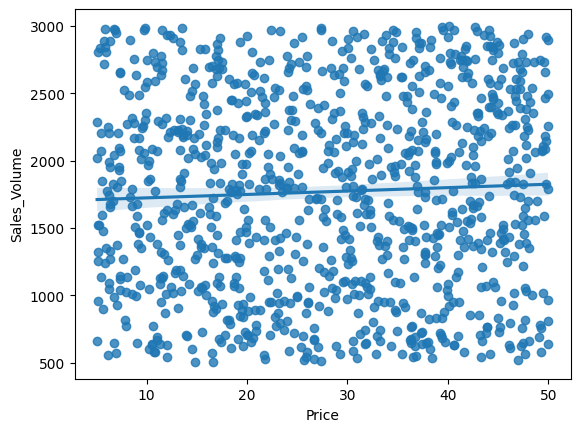

In [ ]:
sns.regplot(x=df['Price'],y=df['Sales_Volume'])

<Axes: xlabel="Competitor's_Price", ylabel='Sales_Volume'>

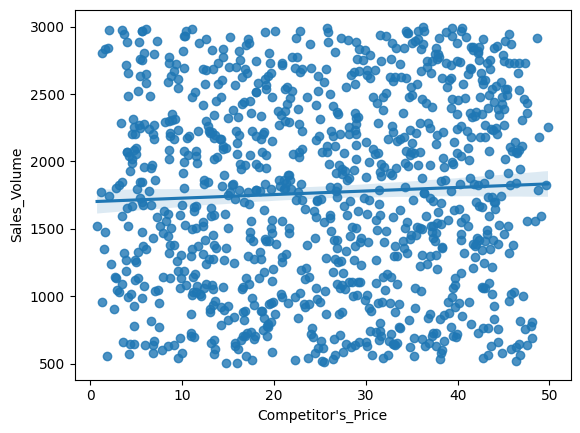

In [ ]:
sns.regplot(x=df['Competitor\'s_Price'],y=df['Sales_Volume'])

array([[<Axes: title={'center': 'Product_ID'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': "Competitor's_Price"}>,
        <Axes: title={'center': 'Sales_Volume'}>]], dtype=object)

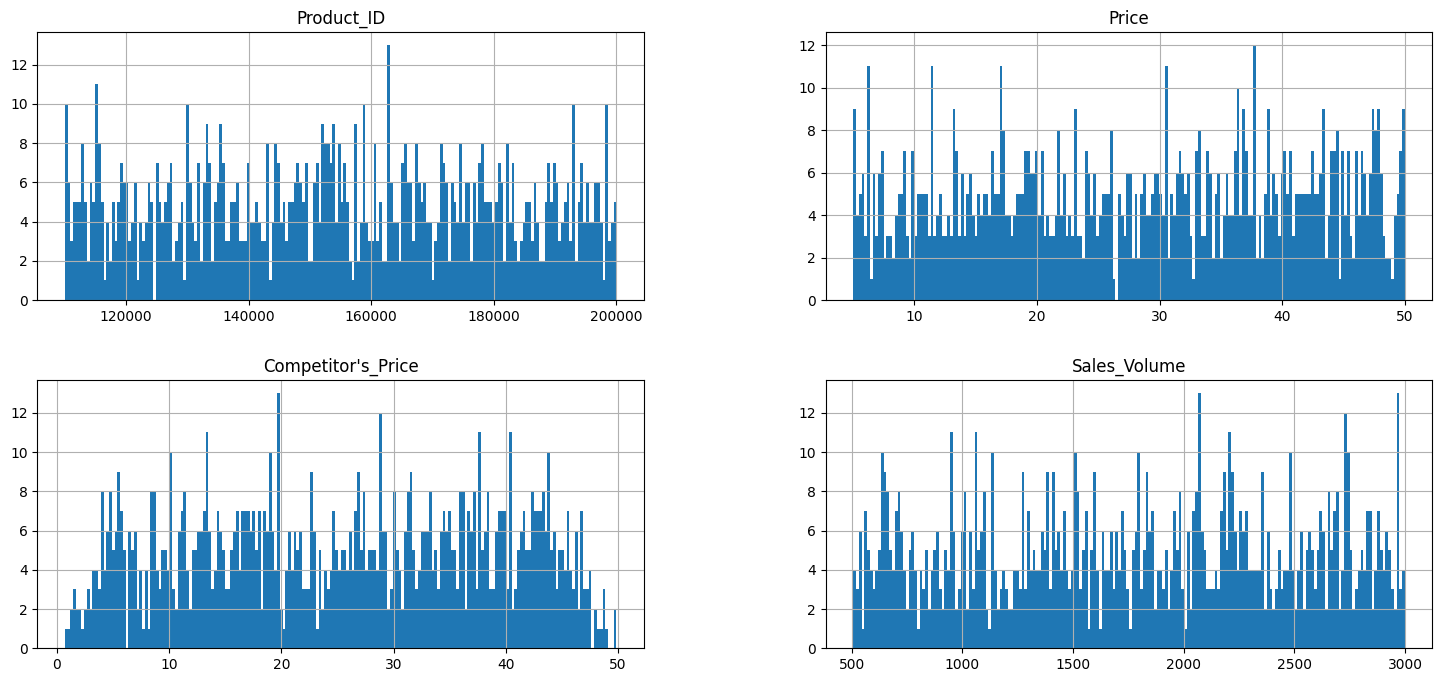

In [ ]:
df.hist(bins=200,figsize=(18,8))

<Axes: >

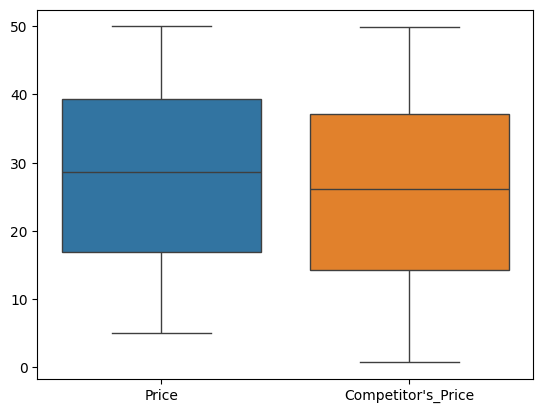

In [ ]:
sns.boxplot(data=df[['Price', "Competitor's_Price"]])

Competitor's Price is little bit lower as compared to our price.

Suggestions:

Further Investigation:

Conduct more in-depth analysis to explore other factors that may influence sales volume, such as pricing strategies, marketing campaigns, customer satisfaction, or external market conditions. Consider collecting additional data or exploring different data sources to gain insights into potential drivers of sales volume.

Segmentation Analysis:

Perform segmentation analysis to identify specific customer segments or product categories that exhibit different purchasing behaviors. This could help tailor marketing strategies or product offerings to better meet the needs of different customer segments.

In [ ]:
# Preprocessing
df.head()

,Product_ID,Product_Position,Price,Competitor's_Price,Promotion,Foot_Traffic,Consumer_Demographics,Product_Category,Seasonal,Sales_Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


In [ ]:
X = df.drop(['Product_ID','Sales_Volume'],axis=1)
y=df['Sales_Volume']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8)

In [ ]:
one_hot_columns = ['Product_Position','Promotion','Consumer_Demographics','Product_Category','Seasonal']
ordinal_columns = ['Foot_Traffic']

In [ ]:
one_hot_encoder = OneHotEncoder(drop='first')
ordinal_encoder = OrdinalEncoder(categories=[['Low','Medium','High']])

preprocessor = ColumnTransformer(transformers=[
    ('onehot',one_hot_encoder,one_hot_columns),
    ('ordinal',ordinal_encoder,ordinal_columns),
], remainder='passthrough')

In [ ]:
X_train

,Product_Position,Price,Competitor's_Price,Promotion,Foot_Traffic,Consumer_Demographics,Product_Category,Seasonal
514,Aisle,34.22,31.38,No,High,Seniors,Clothing,Yes
332,Front of Store,17.48,13.88,No,High,College students,Clothing,Yes
768,End-cap,36.36,31.41,No,High,Seniors,Electronics,Yes
58,End-cap,48.71,46.44,Yes,High,Young adults,Electronics,Yes
202,End-cap,28.87,28.36,No,Low,Seniors,Food,Yes
...,...,...,...,...,...,...,...,...
376,Aisle,25.92,23.68,Yes,High,College students,Electronics,No
264,End-cap,19.47,14.60,No,Medium,College students,Food,Yes
250,Front of Store,9.28,7.91,Yes,Medium,Families,Food,Yes
114,End-cap,19.91,16.77,Yes,Medium,Young adults,Clothing,Yes


In [ ]:
X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_val_preprocessed = pd.DataFrame(preprocessor.transform(X_val),columns=preprocessor.get_feature_names_out())

In [ ]:
X_train_preprocessed

,onehot__Product_Position_End-cap,onehot__Product_Position_Front of Store,onehot__Promotion_Yes,onehot__Consumer_Demographics_Families,onehot__Consumer_Demographics_Seniors,onehot__Consumer_Demographics_Young adults,onehot__Product_Category_Electronics,onehot__Product_Category_Food,onehot__Seasonal_Yes,ordinal__Foot_Traffic,remainder__Price,remainder__Competitor's_Price
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,34.22,31.38
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,17.48,13.88
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,36.36,31.41
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,48.71,46.44
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,28.87,28.36
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,25.92,23.68
796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,19.47,14.60
797,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,9.28,7.91
798,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,19.91,16.77


In [ ]:
# Predictive modelling
# Linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_preprocessed,y_train)
y_pred = model.predict(X_val_preprocessed)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,mean_absolute_percentage_error

print('mean squared error: ',mean_squared_error(y_pred,y_val))
print('mean absolute error: ',mean_absolute_error(y_pred,y_val))
print('r2 score: ',r2_score(y_pred,y_val))
print('mean absolute percentage error: ',mean_absolute_percentage_error(y_pred,y_val))

mean squared error:  517232.45788562746
mean absolute error:  615.8667146243886
r2 score:  -53.26098569116496
mean absolute percentage error:  0.34799534444376645
